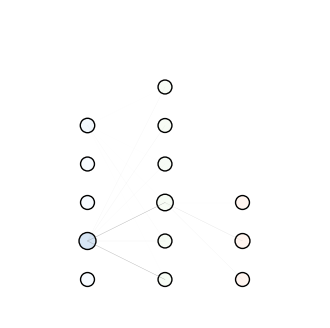

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# define the neural network structure
input_neurons = 5
hidden_neurons = 6
output_neurons = 3

# create random weights
np.random.seed(42)
weights_input_hidden = np.random.uniform(-1, 1, (hidden_neurons, input_neurons))
weights_hidden_output = np.random.uniform(-1, 1, (output_neurons, hidden_neurons))

# create activation function
def activate(x):
    return np.maximum(0, x)  # ReLU for simplicity

# create a function to generate sparse activations
def sparse_activation(vector, sparsity=0.7):
    mask = np.random.choice([0, 1], size=vector.shape, p=[sparsity, 1 - sparsity])
    return vector * mask

# generate frames for the animation
frames = 20
activations = []

for _ in range(frames):
    input_signal = sparse_activation(np.random.uniform(0, 1, input_neurons), sparsity=0.6)
    hidden_signal = activate(np.dot(weights_input_hidden, input_signal))
    hidden_signal = sparse_activation(hidden_signal, sparsity=0.5)  # superimposed representation
    output_signal = activate(np.dot(weights_hidden_output, hidden_signal))
    activations.append((input_signal, hidden_signal, output_signal))

# set up the plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(-1, 3)
ax.set_ylim(-1, max(input_neurons, hidden_neurons, output_neurons) + 1)
ax.axis('off')

# plot placeholders for neurons
input_points = np.array([(0, i) for i in range(input_neurons)])
hidden_points = np.array([(1, i) for i in range(hidden_neurons)])
output_points = np.array([(2, i) for i in range(output_neurons)])

input_scatter = ax.scatter([], [], s=300, cmap='Blues', c=[], edgecolors='black', label='Input Layer')
hidden_scatter = ax.scatter([], [], s=300, cmap='Greens', c=[], edgecolors='black', label='Hidden Layer')
output_scatter = ax.scatter([], [], s=300, cmap='Reds', c=[], edgecolors='black', label='Output Layer')

connections = []

# initialize function
def init():
    global connections
    connections = []
    for i in range(hidden_neurons):
        for j in range(input_neurons):
            connections.append(ax.plot([], [], color='gray', alpha=0.1, linewidth=0.5)[0])
    for i in range(output_neurons):
        for j in range(hidden_neurons):
            connections.append(ax.plot([], [], color='gray', alpha=0.1, linewidth=0.5)[0])
    return input_scatter, hidden_scatter, output_scatter, *connections

# update function
def update(frame):
    input_signal, hidden_signal, output_signal = activations[frame]
    
    # Update neuron colors and sizes based on activation values
    input_scatter.set_offsets(input_points)
    input_scatter.set_array(input_signal)
    input_scatter.set_sizes(100 + 300 * input_signal)  # Size varies with activation

    hidden_scatter.set_offsets(hidden_points)
    hidden_scatter.set_array(hidden_signal)
    hidden_scatter.set_sizes(100 + 300 * hidden_signal)

    output_scatter.set_offsets(output_points)
    output_scatter.set_array(output_signal)
    output_scatter.set_sizes(100 + 300 * output_signal)

    # update connections
    idx = 0
    for i in range(hidden_neurons):
        for j in range(input_neurons):
            start = input_points[j]
            end = hidden_points[i]
            weight = weights_input_hidden[i, j]
            alpha = 0.6 if weight * input_signal[j] > 0 else 0.1
            connections[idx].set_data([start[0], end[0]], [start[1], end[1]])
            connections[idx].set_alpha(alpha)
            connections[idx].set_linewidth(2 * abs(weight * input_signal[j]))
            idx += 1

    for i in range(output_neurons):
        for j in range(hidden_neurons):
            start = hidden_points[j]
            end = output_points[i]
            weight = weights_hidden_output[i, j]
            alpha = 0.6 if weight * hidden_signal[j] > 0 else 0.1
            connections[idx].set_data([start[0], end[0]], [start[1], end[1]])
            connections[idx].set_alpha(alpha)
            connections[idx].set_linewidth(2 * abs(weight * hidden_signal[j]))
            idx += 1

    return input_scatter, hidden_scatter, output_scatter, *connections

# create the animation
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=False, interval=300)

# save as GIF
ani.save("neural_network_sparse_superposition_clean.gif", writer=PillowWriter(fps=5))

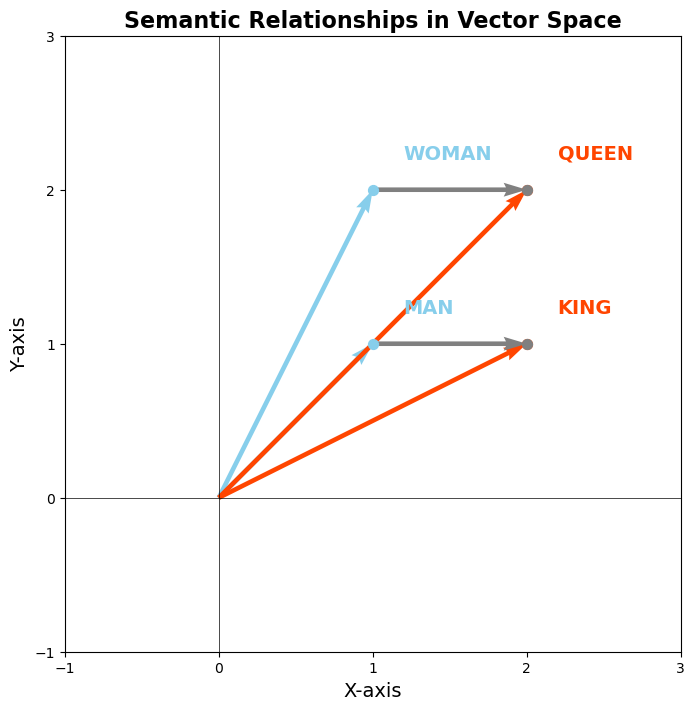

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# function to plot vectors
def plot_vector(v, origin=[0, 0], label='', color='blue', linestyle='-'):
    plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color=color, linestyle=linestyle, linewidth=2)
    plt.scatter(v[0] + origin[0], v[1] + origin[1], color=color, s=50, zorder=5)  # add a dot at the vector endpoint
    label_offset_x = 0.2 if v[0] >= 0 else -0.4  # adjust x-offset for label
    label_offset_y = 0.2 if v[1] >= 0 else -0.4  # adjust y-offset for label
    plt.text(v[0] + origin[0] + label_offset_x, 
             v[1] + origin[1] + label_offset_y, 
             f'{label}', 
             color=color, 
             fontsize=14, 
             fontweight='bold')

# create figure and axis
plt.figure(figsize=(8, 8))
ax = plt.gca()

# define vectors
man = np.array([1, 1])
woman = np.array([1, 2])
king = np.array([2, 1])
queen = king + (woman - man)

# plot the base vectors
plot_vector(man, label='MAN', color='skyblue')
plot_vector(woman, label='WOMAN', color='skyblue')
plot_vector(king, label='KING', color='orangered')
plot_vector(queen, label='QUEEN', color='orangered')

# plot the difference vectors
plot_vector(king - man, origin=man, label='', color='gray', linestyle='--')
plot_vector(queen - woman, origin=woman, label='', color='gray', linestyle='--')

# add background grid
#plt.grid(which='both', color='lightgray', linestyle='--', linewidth=0.5)

# set axis properties
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xticks(np.arange(-1, 4, step=1))
plt.yticks(np.arange(-1, 4, step=1))
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.gca().set_aspect('equal', adjustable='box')

# title and labels
plt.title('Semantic Relationships in Vector Space', fontsize=16, fontweight='bold')
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

# show the plot
plt.savefig('semantic_relationships_in_vector_space.png')
plt.show()
